# Forzado armónico de un sistema de un único grado de libertad

[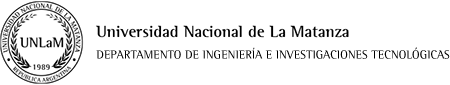](https://ingenieria.unlam.edu.ar/)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Forzado armónico

Partiremos del mismo sistema con que se analizó el caso sin forzado externo, $\vec{F}(t)=0$.
Obtendremos nuevamente, pero en forma compacta, la ecuación de movimiento del sistema para un $\vec{F}(t) \neq 0$.
Y luego obtendremos la solución general de la ecuación de movimiento para el caso en que este forzamiento externo es una fuerza armónica.

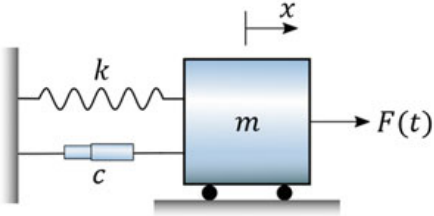

Se aplica una $\vec{F}(t)$ a un sistema caracterizado por

- m : masa
- c : coeficiente de de una fuerza de amortiguación lineal con la velocidad
- k : coeficiente de rigidez (stiffness) de un resorte que proveé una fuerza de Hooke

## Expresión general de la dinámica oscilatoria

In [1]:
# biblioteca de cálculo simbólico
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
# posición
x = me.dynamicsymbols('x')
e = sm.physics.vector.ReferenceFrame('e') # marco referencial en coordenadas cartesianas
carro_r = x* e.x

In [3]:
def energia_cinetica_traslacion(masa, posicion, marco_referencia):
    r"""Calcula la energía cinética traslacional de una partícula puntual.
    
    La energía cinética se calcula como:
        T = (1/2) * m * v · v
    donde v es la velocidad de la partícula en el marco de referencia dado.
    
    Parameters
    ----------
    masa : sympy.core.symbol.Symbol
        Masa de la partícula
        
    posicion : sympy.physics.vector.vector.Vector
        Vector de posición del centro de masa de la partícula
        
    marco_referencia : sympy.physics.vector.frame.ReferenceFrame
        Marco de referencia en el que se expresa la posición y velocidad
    
    Returns
    -------
    sympy.core.mul.Mul
        Energía cinética traslacional de la partícula.
        Puede depender de coordenadas, velocidades generalizadas y tiempo.
    """
    # Calcular velocidad en el marco de referenciac
    velocidad = posicion.dt(marco_referencia)
    
    # Calcular energía cinética: T = (1/2) * m * v·v
    factor_un_medio = sm.Rational(1, 2)
    energia_cinetica = (factor_un_medio * masa * velocidad.dot(velocidad))
    
    # Simplificar la expresión resultante
    return energia_cinetica.simplify()

In [4]:
carro_m = sm.symbols('m', positive=True)  # masa del carro
carro_T = energia_cinetica_traslacion(carro_m, carro_r, e)

In [5]:
# energía potencial elástica
resorte_k= sm.symbols('k', positive=True)  # constante del resorte
factor_un_medio = sm.Rational(1,2) # Rational: fracción de enteros
carro_V = factor_un_medio* resorte_k* carro_r.dot(carro_r)

In [6]:
def euler_lagrange_homogenea(T, V, q):
    r"""Calcula la ecuación de Euler-Lagrange homogénea para una coordenada generalizada.
    
    La ecuación se obtiene a partir del lagrangiano L = T - V:
        d/dt(∂L/∂q̇) - ∂L/∂q = 0
    
    donde:
        T = energía cinética
        V = energía potencial  
        q = coordenada generalizada
        q̇ = derivada temporal de la coordenada generalizada
    
    Parámetros
    ----------
    T : sympy.core.relational.Equality
        Igualdad Sympy cuyo lado derecho contiene la energía cinética del sistema
        en función de coordenadas, velocidades generalizadas y tiempo.
        
    V : sympy.core.relational.Equality
        Igualdad Sympy cuyo lado derecho contiene la energía potencial del sistema
        en función de coordenadas, velocidades generalizadas y tiempo.
        
    q : sympy.core.symbol.Symbol
        Coordenada generalizada para la cual se calcula la ecuación de Euler-Lagrange
    
    Retorna
    -------
    sympy.core.relational.Equality
        Ecuación de Euler-Lagrange homogénea para la coordenada generalizada
    """
    # Calcular el lagrangiano: L = T - V
    lagrangiano = (T - V).expand()
    
    # Definir variable tiempo para derivadas temporales
    t = sm.Symbol('t')
    
    # Calcular ecuación de Euler-Lagrange: d/dt(∂L/∂q̇) - ∂L/∂q = 0
    termino_simil_masa_aceleracion = lagrangiano.diff(q.diff(t)).diff(t)
    termino_simil_fuerzas_conservativas = lagrangiano.diff(q)
    
    # Formar la ecuación de Euler-Lagrange homogénea (igualada a cero)
    ecuacion = sm.Eq(termino_simil_masa_aceleracion - termino_simil_fuerzas_conservativas, 0)
    
    return ecuacion.simplify()

In [7]:
x_EL_homogenea = euler_lagrange_homogenea(carro_T, carro_V, x)

In [8]:
# suma vectorial de fuerzas no conservativas
c = sm.symbols('c', positive = True)
F = me.dynamicsymbols('F')
t = sm.Symbol('t')
f = F* e.x - c* carro_r.diff(t,e)

In [9]:
x_Q = f.dot(e.x)

In [10]:
# ecuación de Euler-Lagrange con fuerzas no conservativas
x_EL = sm.Eq(
  x_EL_homogenea.lhs,
  x_Q
)

In [11]:
# aislando el forzado
x_EL_aislado = sm.Eq(
  sm.solve(x_EL, F)[0],
  F
)
x_EL_aislado

In [12]:
dinamica_sin_normalizar = x_EL_aislado
masa = carro_m
dinamica_normalizada = sm.Eq(
  dinamica_sin_normalizar.lhs/ masa,
  dinamica_sin_normalizar.rhs/ masa
).expand()
dinamica_normalizada

In [13]:
omega, zeta = sm.symbols('omega zeta', positive = True)
masa = carro_m
k = resorte_k
substituciones_dict = {
    k / masa: omega**2,
    c / masa: 2 * zeta * omega
}
x_EL_ing = dinamica_normalizada.subs(substituciones_dict)
x_EL_ing

## Forzado armónico
Vimos que cuando $F=0$ el movimiento se extingue más o menos rápido en función del $c$ de amortiguación, pero finalmente lo hace.
La solución de la ecuación homogénea produce entonces una **solución transitoria**.
En la presencia de $F(t)$ esta determina la **solución de estado estable** que es la que finalmente domina la dinámica. 

Se estudiará primero la respuesta el sistema con una fuerza armónica

> **Referencia**
> - 4.2 Oscilador sometido a una fuerza impulsora senoidal  
Dinámica clásica de las partículas y los sistemas  
J. B. Marion  
>  
> - 1.6 Oscilador armónico forzado  
Ondas es física  
O. E. Martínez  

In [14]:
F_0, omega_f = sm.symbols('F_0 omega_f', positive = True)
forzado = F_0* sm.sin(omega_f* t)
sm.Eq(F, forzado)

La ecuación diferencial a resolver es 

In [15]:
x_EL_ing_forzado = x_EL_ing.subs(F, forzado)
x_EL_ing_forzado

Sabemos que substituyendo la solución particular que responde a tal forzado $x_p = A_1 \cos{\omega_f t} + A_2 \sin{\omega_f t}$ en la ecuación permite obtener los $A_i$.
Pero `sympy` puede encargarse de todo el proceso y darnos $x = x_h + x_p$ directamente. 

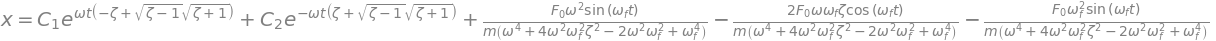

In [16]:
x_forzadoArmonico_sol = sm.dsolve(x_EL_ing_forzado)
x_forzadoArmonico_sol

Los términos que dependen de $C_i$ son los de la solución homogénea que se considera se presenta durante un **transitorio** que se extiende extinto para $t> 10 \tau$ (10 **períodos de relajación**).
Para tiempos posteriores la solución alcanza el **estado estacionario** dado por los términos que dependen del forzado.

Se establece $C_1 = C_2 = 0$ para obtener solo $x_p(t)$.

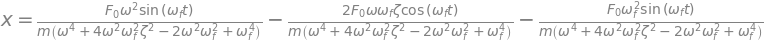

In [17]:
x_forzadoArmonico = x_forzadoArmonico_sol.subs([('C1', 0), ('C2', 0)])
x_forzadoArmonico

### Régimen sub-amortiguado

Se discutió oportunamente porque se busca operar en el régimen sub-amortiguado.
Para el siguiente análisis se establece un valor para $\zeta = 0.2$ que asegure tal régimen.

Pasa a ser de interés como varía la amplitud de la oscilación de $x$ en función de los parámetros del forzado.
Evidentemente, es lineal con la amplitud del forzado, $F_0$, por lo que el análisis apunta a qué comportamientos causan distintas frecuencias, $\omega_f$, del mismo.

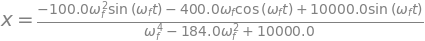

In [18]:
k_magnitud = 100 # [N m-1]
m_magnitud = 1 # [kg]
zeta_magnitud = 0.2 # [s-1]
F_0_magnitud = 100 # [N]

parametros ={
    zeta : zeta_magnitud,
    omega : sm.sqrt(k_magnitud/m_magnitud),
    carro_m : m_magnitud,
    F_0 : F_0_magnitud
}
x_forzadoArmonico_parametros = x_forzadoArmonico.subs(parametros).simplify()
x_forzadoArmonico_parametros

### Amplitud en función de $\omega_f$

Todos los términos son armónicos en función de $\omega_f t$, lo que permitiría agruparles en la forma
$$
  x_p(t) = A_\text{cos} \cos{(\omega_f t)} + A_\text{sin} \sin{(\omega_f t)}
  .
$$
Esto puede escribirse como
$$
  x_p(t) = A \cos{(\omega_f t - \phi)}
  ,
$$
donde $A = \sqrt{A_\text{cos}^2 + A_\text{sin}^2}$ es la amplitud y $\phi$ un desfase.

Puesto que nos interesa la amplitud de la oscilación, determinamos los $A_\text{cos}$ y $A_\text{sin}$ que acompañan respectivamente a $\cos{(\omega_f t)}$ y $\sin{(\omega_f t)}$ usando el método `collect`.

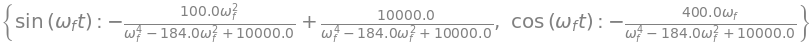

In [19]:
armonicos = [sm.sin(omega_f* t), sm.cos(omega_f* t)]
coeficientes = sm.collect(x_forzadoArmonico_parametros.rhs.expand(), armonicos, evaluate=False)
coeficientes

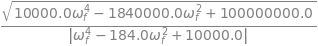

In [21]:
A_sin = coeficientes[armonicos[0]]
A_cos = coeficientes[armonicos[1]]
A = sm.sqrt(A_sin**2 + A_cos**2)
A_simplificado = sm.simplify(A)
A_simplificado

La manera más rápida de visualizar la dependencia con $\omega_f$ es graficando esta expresión.

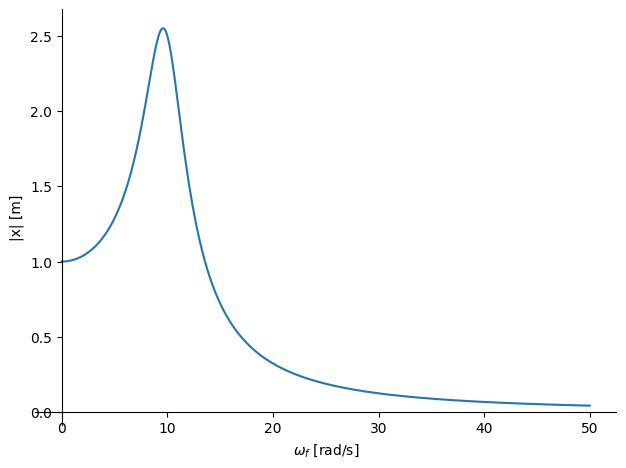

In [22]:
sm.plot(A_simplificado, (omega_f,0, 50), ylabel='|x| [m]', xlabel=r'$\omega_f$ [rad/s]') 

¿Y a que $\omega$ corresponde ese pico? Pues a no otra que

In [23]:
sm.Eq(omega, sm.sqrt(k_magnitud/m_magnitud))

Cuando un sistema es excitado con una oscilación armónica de la frecuencia en que el sistema aislado oscilaría, la transferencia de energía es máxima y por tanto se alcanza la máxima amplitud de oscilación.
Esto se llama **resonancia** y es algo que debe evitarse si se busca una relativa estabilidad del sistema.